<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/main/Srock_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas_datareader

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [ ]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,92.868824,90.253350,91.531878,91.633083,1.479715e+08,91.053421
std,21.067448,20.460082,20.947689,20.739685,7.893624e+07,21.098782
min,57.125000,53.152500,57.020000,56.092499,2.019780e+07,55.291519
25%,75.150002,72.379997,73.879997,74.357498,1.008056e+08,73.122154
50%,86.419998,83.144997,83.312500,84.699997,1.335876e+08,84.401947
75%,115.849998,112.500000,114.352501,114.089996,1.846420e+08,113.893501
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [ ]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-12-09 to 2020-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


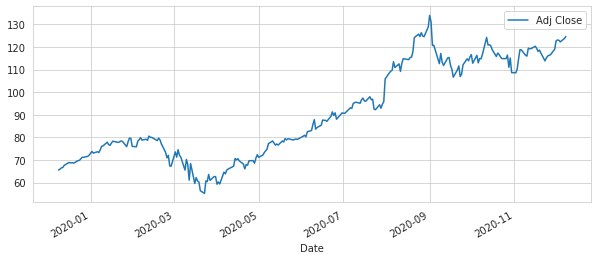

In [ ]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

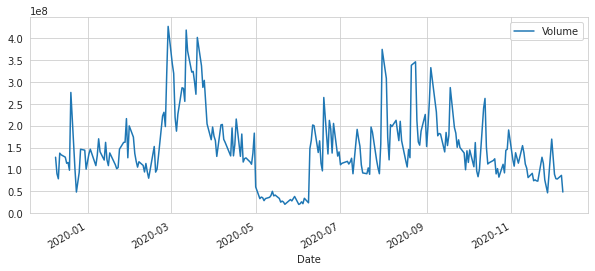

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [ ]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-09,67.699997,66.227501,67.500000,66.730003,128042400.0,65.621384
2019-12-10,67.517502,66.464996,67.150002,67.120003,90420400.0,66.004898
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.567886
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.737518
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.644707


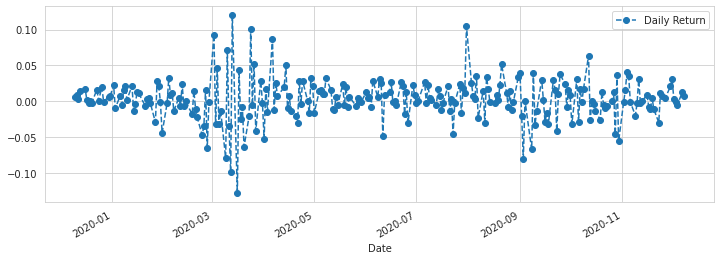

In [ ]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


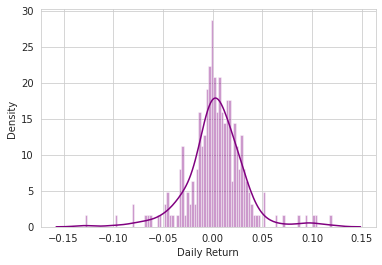

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [ ]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-09,65.621384,1343.560059,149.773361,1749.510010
2019-12-10,66.004898,1344.660034,149.545792,1739.209961
2019-12-11,66.567886,1345.020020,150.109772,1748.719971
2019-12-12,66.737518,1350.270020,151.633667,1760.329956
2019-12-13,67.644707,1347.829956,152.910126,1760.939941


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


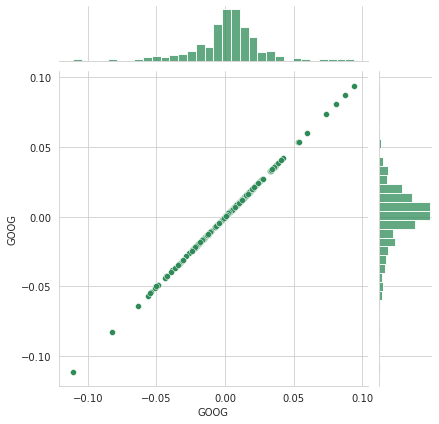

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


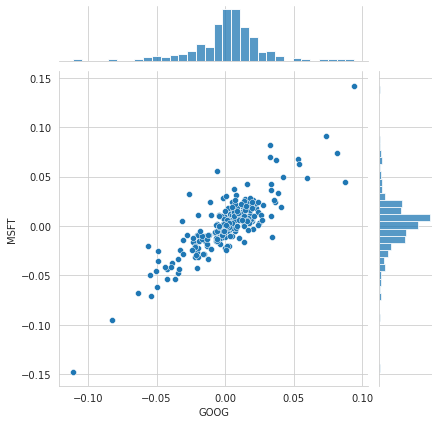

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

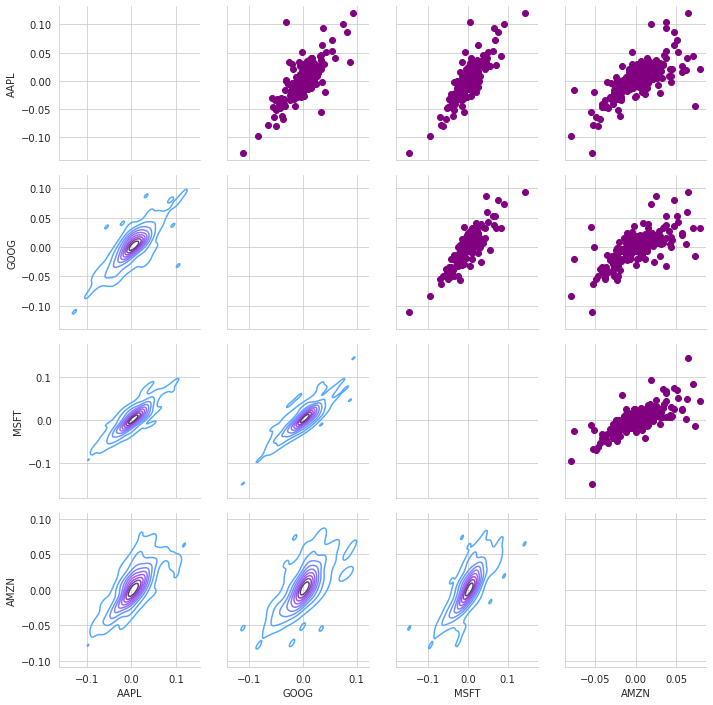

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

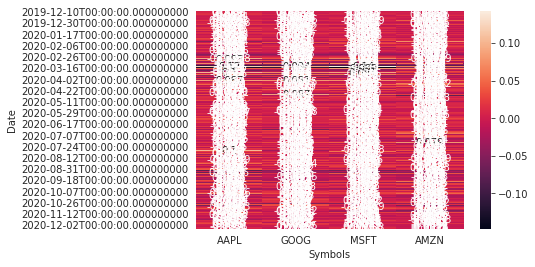

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna(),annot=True)

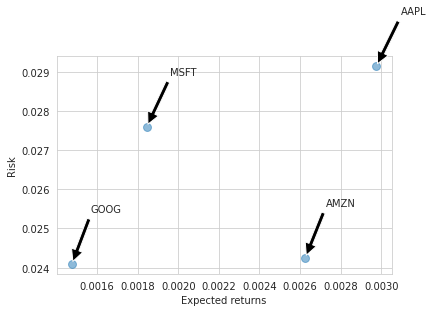

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black', shrink=0.05)
        # arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
        )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


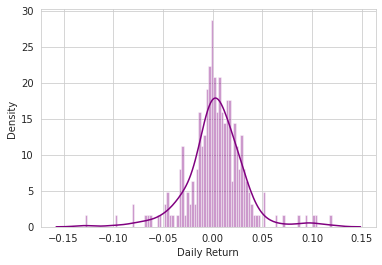

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.04486859156872969

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect('sakila.db')

In [ ]:
sql_query = '''select * from customer;'''

In [ ]:
customer_df = pd.read_sql(sql_query,con)

DatabaseError: ignored

In [1]:
a = True

In [2]:
not a

False